# Introduction

In [ ]:
"""
What? Introduction to SVMs for classification

VanderPlas, Jake. Python data science handbook: Essential tools for working with data. O'Reilly Media, Inc.", 2016.
https://github.com/jakevdp/PythonDataScienceHandbook
"""

# Import

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
# use Seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs 
from sklearn.svm import SVC 

# Generate synthetic dataset

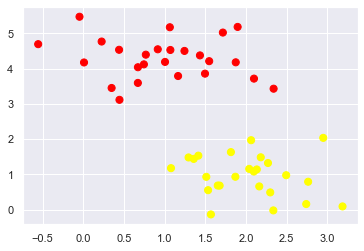

In [5]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

# Naive approach

In [ ]:
"""
A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, 
and thereby create a model for classification. For two-dimensional data like that shown here, this is a 
task we could do by hand. But immediately we see a problem: there is more than one possible dividing line 
that can perfectly discrimi‐ nate between the two classes!
"""

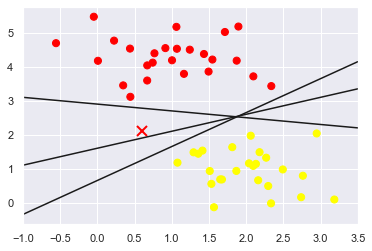

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: 
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

In [ ]:
"""
You can see how drawing a line between classes” is not enough, and we need to think a bit deeper!
SVMs maximialise the margine and the answer to our problem.
"""

# SVM approach

In [ ]:
"""
Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a
zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. 
"""

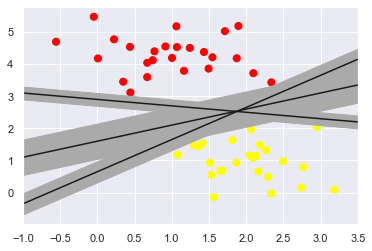

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit=m*xfit+b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA',)
plt.xlim(-1, 3.5);

In [ ]:
"""
In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.
Support vector machines are an example of such a max‐ imum margin estimator.
"""

In [ ]:
"""
Let’s see the result of an actual fit to this data: we will use Scikit-Learn’s support vector classifier to
train an SVM model on this data. For the time being, we will use a linear kernel and set the C parameter to a 
very large number (we’ll discuss the meaning of these in more depth momentarily):
"""

In [11]:
# "Support vector classifier" 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [13]:
def plot_svc_decision_function(model, ax=None, plot_support=True): 
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support: ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)    

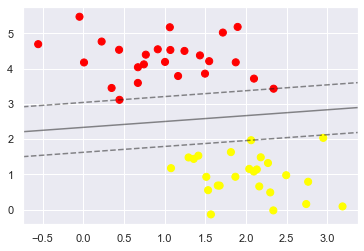

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
"""
A support vector machine classifier fit to the data, with margins (dashed lines) and support vectors 
(circles) shown. This is the dividing line that maximizes the margin between the two sets of points. 
Notice that a few of the training points just touch the margin; they are indicated by the black circles.
These points are the pivotal elements of this fit, and are known as the support vectors, and give the 
algorithm its name. We get the coordinates of the support vectors like this:
"""

In [15]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [ ]:
"""
A key to this classifier’s success is that for the fit, only the position of the support vec‐ tors matters;
any points further from the margin that are on the correct side do not modify the fit!
"""